<IPython.core.display.Javascript object>


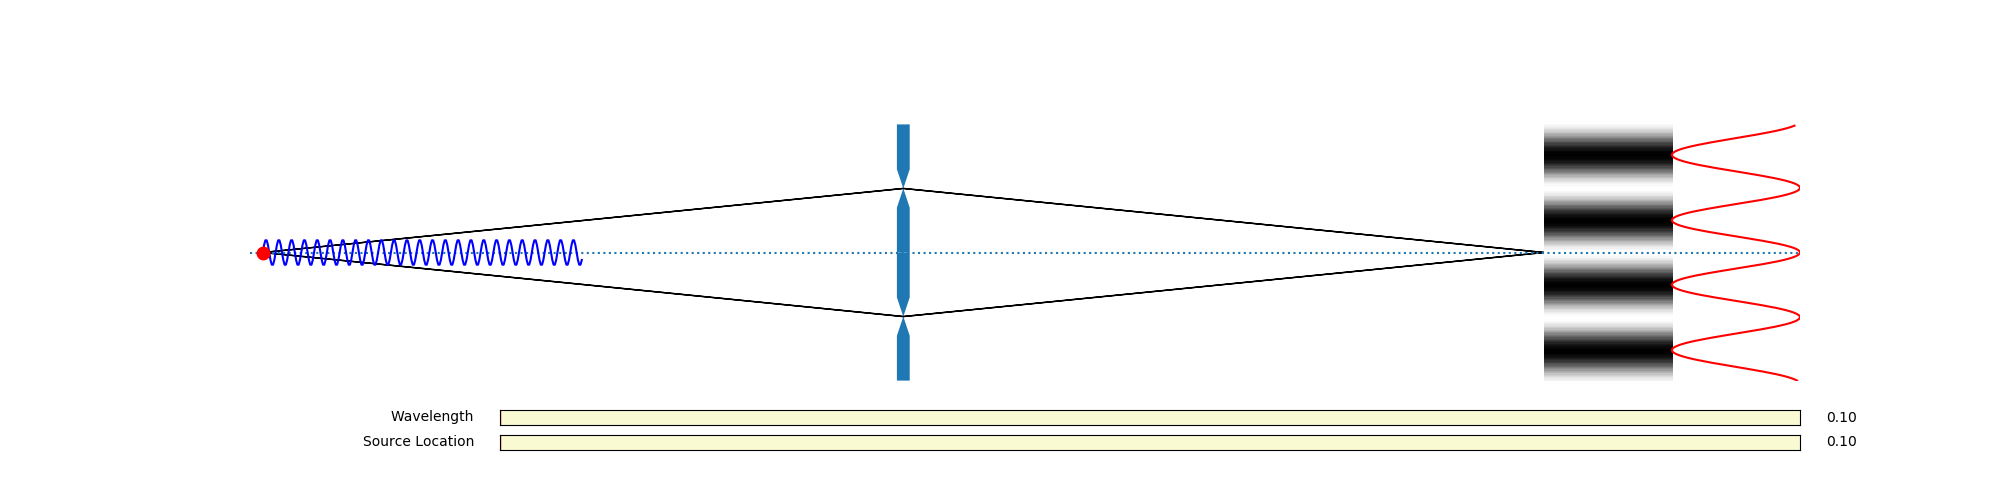

In [11]:
from math import *
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Circle, Wedge
from matplotlib import animation
import matplotlib as mpl
import numpy as np
from matplotlib.widgets import Slider, Button, RadioButtons
%matplotlib notebook

def double_slit (p0=[0],a0=[1],baseline=1,d1=5,d2=5,wavelength=.1,maxint=None):
    """Renders a toy dual-slit experiment.
    'p0' is a list or array of source positions (drawn along the vertical axis)
    'a0' is an array of source intensities 
    'baseline' is the distance between the slits 
    'd1' and 'd2' are distances between source and plate and plate and screen
    'wavelength' is wavelength
    'maxint' is the maximum intensity scale use to render the fringe pattern. If None, the pattern
       is auto-scaled. Maxint is useful if you want to render fringes from multiple invocations
       of double_slit() into the same intensity scale, i.e. for comparison.
    """
    ## setup figure and axes
    plt.figure(figsize=(20, 5))
    plt.axes(frameon=False)
    plt.xlim(-d1-.1, d2+2) and plt.ylim(-1, 1)
    plt.xticks([]) and plt.yticks([])
    plt.axhline(0, ls=':')
    baseline /= 2.
    ## draw representation of slits
    plt.arrow(0, 1,0, baseline-1, lw=0, width=.1, head_width=.1, length_includes_head=True)
    plt.arrow(0,-1,0, 1-baseline, lw=0, width=.1, head_width=.1, length_includes_head=True)
    plt.arrow(0, 0,0,  baseline,  lw=0, width=.1, head_width=.1, length_includes_head=True)
    plt.arrow(0, 0,0, -baseline,  lw=0, width=.1, head_width=.1, length_includes_head=True)
    ## draw representation of lightpath from slits to centre of screen
    plt.arrow(0, baseline,d2,-baseline, length_includes_head=True)
    plt.arrow(0,-baseline,d2, baseline, length_includes_head=True)
    ## draw representation of sinewave from the central position
    xw = np.arange(-d1, -d1+(d1+d2)/4, .01)
    yw = np.sin(2*np.pi*xw/wavelength)*.1 + (p0[0]+p0[-1])/2
    plt.plot(xw,yw,'b')
    ## 'xs' is a vector of x cordinates on the screen
    ## and we accumulate the interference pattern for each source into 'pattern'
    xs = np.arange(-1, 1, .01) 
    pattern = 0
    total_intensity = 0
    ## compute contribution to pattern from each source position p
    for p,a in np.broadcast(p0,a0):
        plt.plot(-d1, p, marker='o', ms=10, mfc='red', mew=0)
        total_intensity += a
        if p == p0[0] or p == p0[-1]:
            plt.arrow(-d1, p, d1, baseline-p, length_includes_head=True)
            plt.arrow(-d1, p, d1,-baseline-p, length_includes_head=True)
        # compute the two pathlenghts
        path1 = np.sqrt(d1**2 + (p-baseline)**2) + np.sqrt(d2**2 + (xs-baseline)**2)
        path2 = np.sqrt(d1**2 + (p+baseline)**2) + np.sqrt(d2**2 + (xs+baseline)**2)
        diff = path1 - path2
        # caccumulate interference pattern from this source
        pattern = pattern + a*np.cos(2*np.pi*diff/wavelength) 
    maxint = maxint or total_intensity
    # add fake axis to interference pattern just to make it a "wide" image
    pattern_image = pattern[:,np.newaxis] + np.zeros(10)[np.newaxis,:]
    plt.imshow(pattern_image, extent=(d2,d2+1,-1,1), cmap=plt.gray(), vmin=-maxint, vmax=maxint)
    # make a plot of the interference pattern
    plt.plot(d2+1.5+pattern/(maxint*2), xs, 'r')
    plt.show()

    #@widgets.interact(p0=(0,10,0.001),a0=(1,10,0.001),baseline=(1,10,0.001),d1=(5,10,0.001),d2=(5,10,0.001),wavelength=(0,10,0.001)
    #ax=plt.gca() #select axis object contining old figure
    #create_figure(p0,a0,baseline,d1,d2,wavelength,maxint)# create new figure
    p0=0
    wavelength=.1
    axcolor = 'lightgoldenrodyellow'
    axloc = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
    axwave = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
    #axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
    sp0 = Slider(axloc, 'Source Location', 0.1, 30.0, valinit=p0)
    swave = Slider(axwave, 'Wavelength', 0.1, 10.0, valinit=wavelength)
    
    def update(val):
        source = sp0.val
        l.set_ydata(source)
        fig.canvas.draw_idle()


        sp0.on_changed(update)
        resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
        button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


        def reset(event):
            sp0.reset()
            button.on_clicked(reset)



# show pattern for one source at 0
double_slit(p0=[0])